In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version = 1)

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [37]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone


import cv2 as cv

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"].values, mnist["target"].values

In [5]:
X.shape, y.shape

((70000, 784), (70000,))

In [6]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

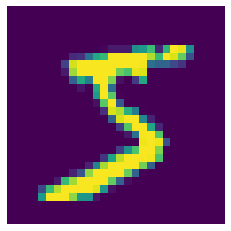

In [7]:
plt.imshow(some_digit_image)
plt.axis(False)
plt.show()

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[:60000]

In [9]:
y_train_5 = (y_train == "5")
y_test_5 = (y_test == "5")

In [10]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
predicted = sgd_clf.predict(X_test)

In [12]:
skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

In [13]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    print(train_index, test_index)
    clone_clf = clone(sgd_clf)
    
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_test_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    
    print(n_correct/len(y_pred))

[    1     3     4 ... 59994 59996 59998] [    0     2     6 ... 59995 59997 59999]
0.9669
[    0     2     3 ... 59997 59998 59999] [    1    10    11 ... 59988 59989 59991]
0.91625
[    0     1     2 ... 59995 59997 59999] [    3     4     5 ... 59994 59996 59998]
0.96785


In [14]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [15]:
y_predict = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [16]:
confusion_matrix(y_train_5, y_predict)

array([[53892,   687],
       [ 1891,  3530]])

In [17]:
precision = precision_score(y_train_5, y_predict)
recall = recall_score(y_train_5, y_predict)

In [18]:
print(precision, recall)

0.8370879772350012 0.6511713705958311


In [19]:
f1_score(y_train_5, y_predict)

0.7325171197343846

In [20]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = "decision_function")


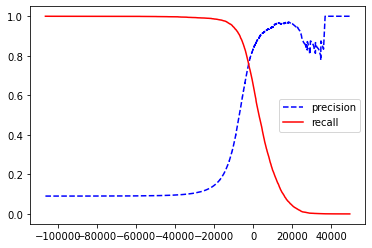

In [29]:
precision, recall, threshold = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_curve(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "b--", label = "precision")
    plt.plot(threshold, recall[:-1], "r", label = "recall")
    plt.legend()
    
plot_precision_recall_curve(precision, recall, threshold)

In [32]:
len(y_scores)

60000

In [38]:
forest_clf = RandomForestClassifier(random_state = 4)

In [39]:
y_probabs= cross_val_predict(forest_clf, X_train, y_train_5, cv= 3, method = "predict_proba")

In [43]:
y_score_forest = y_probabs[:,1]
fpr_forest, tpr_forest, threshhold = roc_curve(y_train_5, y_score_forest)

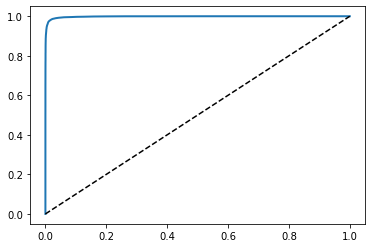

In [44]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    
plot_roc_curve(fpr_forest, tpr_forest, "RandomForest")

In [46]:
roc_auc_score(y_train_5, y_score_forest)

0.9983270697117472